In [1]:
from pathlib import Path
import xarray as xr
import numpy as np

In [2]:
basepath = Path("/workspace/data/africa_v0.3/train/")

minicube_paths = list(basepath.glob("*/*.nc"))

In [3]:
minicube = xr.open_dataset(minicube_paths[2])
minicube.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:               (time: 450, lon: 128, lat: 128, time_clim: 12)
Coordinates:
  * time                  (time) datetime64[ns] 2020-01-08 ... 2021-04-01
  * lon                   (lon) float64 19.39 19.39 19.39 ... 19.4 19.4 19.4
  * lat                   (lat) float64 -12.53 -12.53 -12.53 ... -12.54 -12.54
  * time_clim             (time_clim) datetime64[ns] 1970-01-15 ... 1970-12-15
Data variables: (12/72)
    s2_avail              (time) float32 ...
    s2_B02                (time, lat, lon) float32 ...
    s2_B03                (time, lat, lon) float32 ...
    s2_B04                (time, lat, lon) float32 ...
    s2_B05                (time, lat, lon) float32 ...
    s2_B06                (time, lat, lon) float32 ...
    ...                    ...
    sg_sand_top_mean      (lat, lon) float32 ...
    sg_sand_sub_mean      (lat, lon) float32 ...
    sg_silt_top_mean      (lat, lon) float32 ...
    sg_silt_sub_mean      (lat, lon)

450


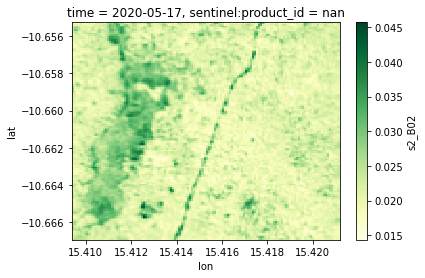

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
cmap_veg = clr.LinearSegmentedColormap.from_list('veg', ['#ffffe5','#f7fcb9','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#006837','#004529'])
minicube = xr.open_dataset(minicube_paths[1])
t_max = len(minicube.time.values)
print(t_max)


minicube.s2_B02.isel(time=t_max - 1).plot(cmap=cmap_veg)

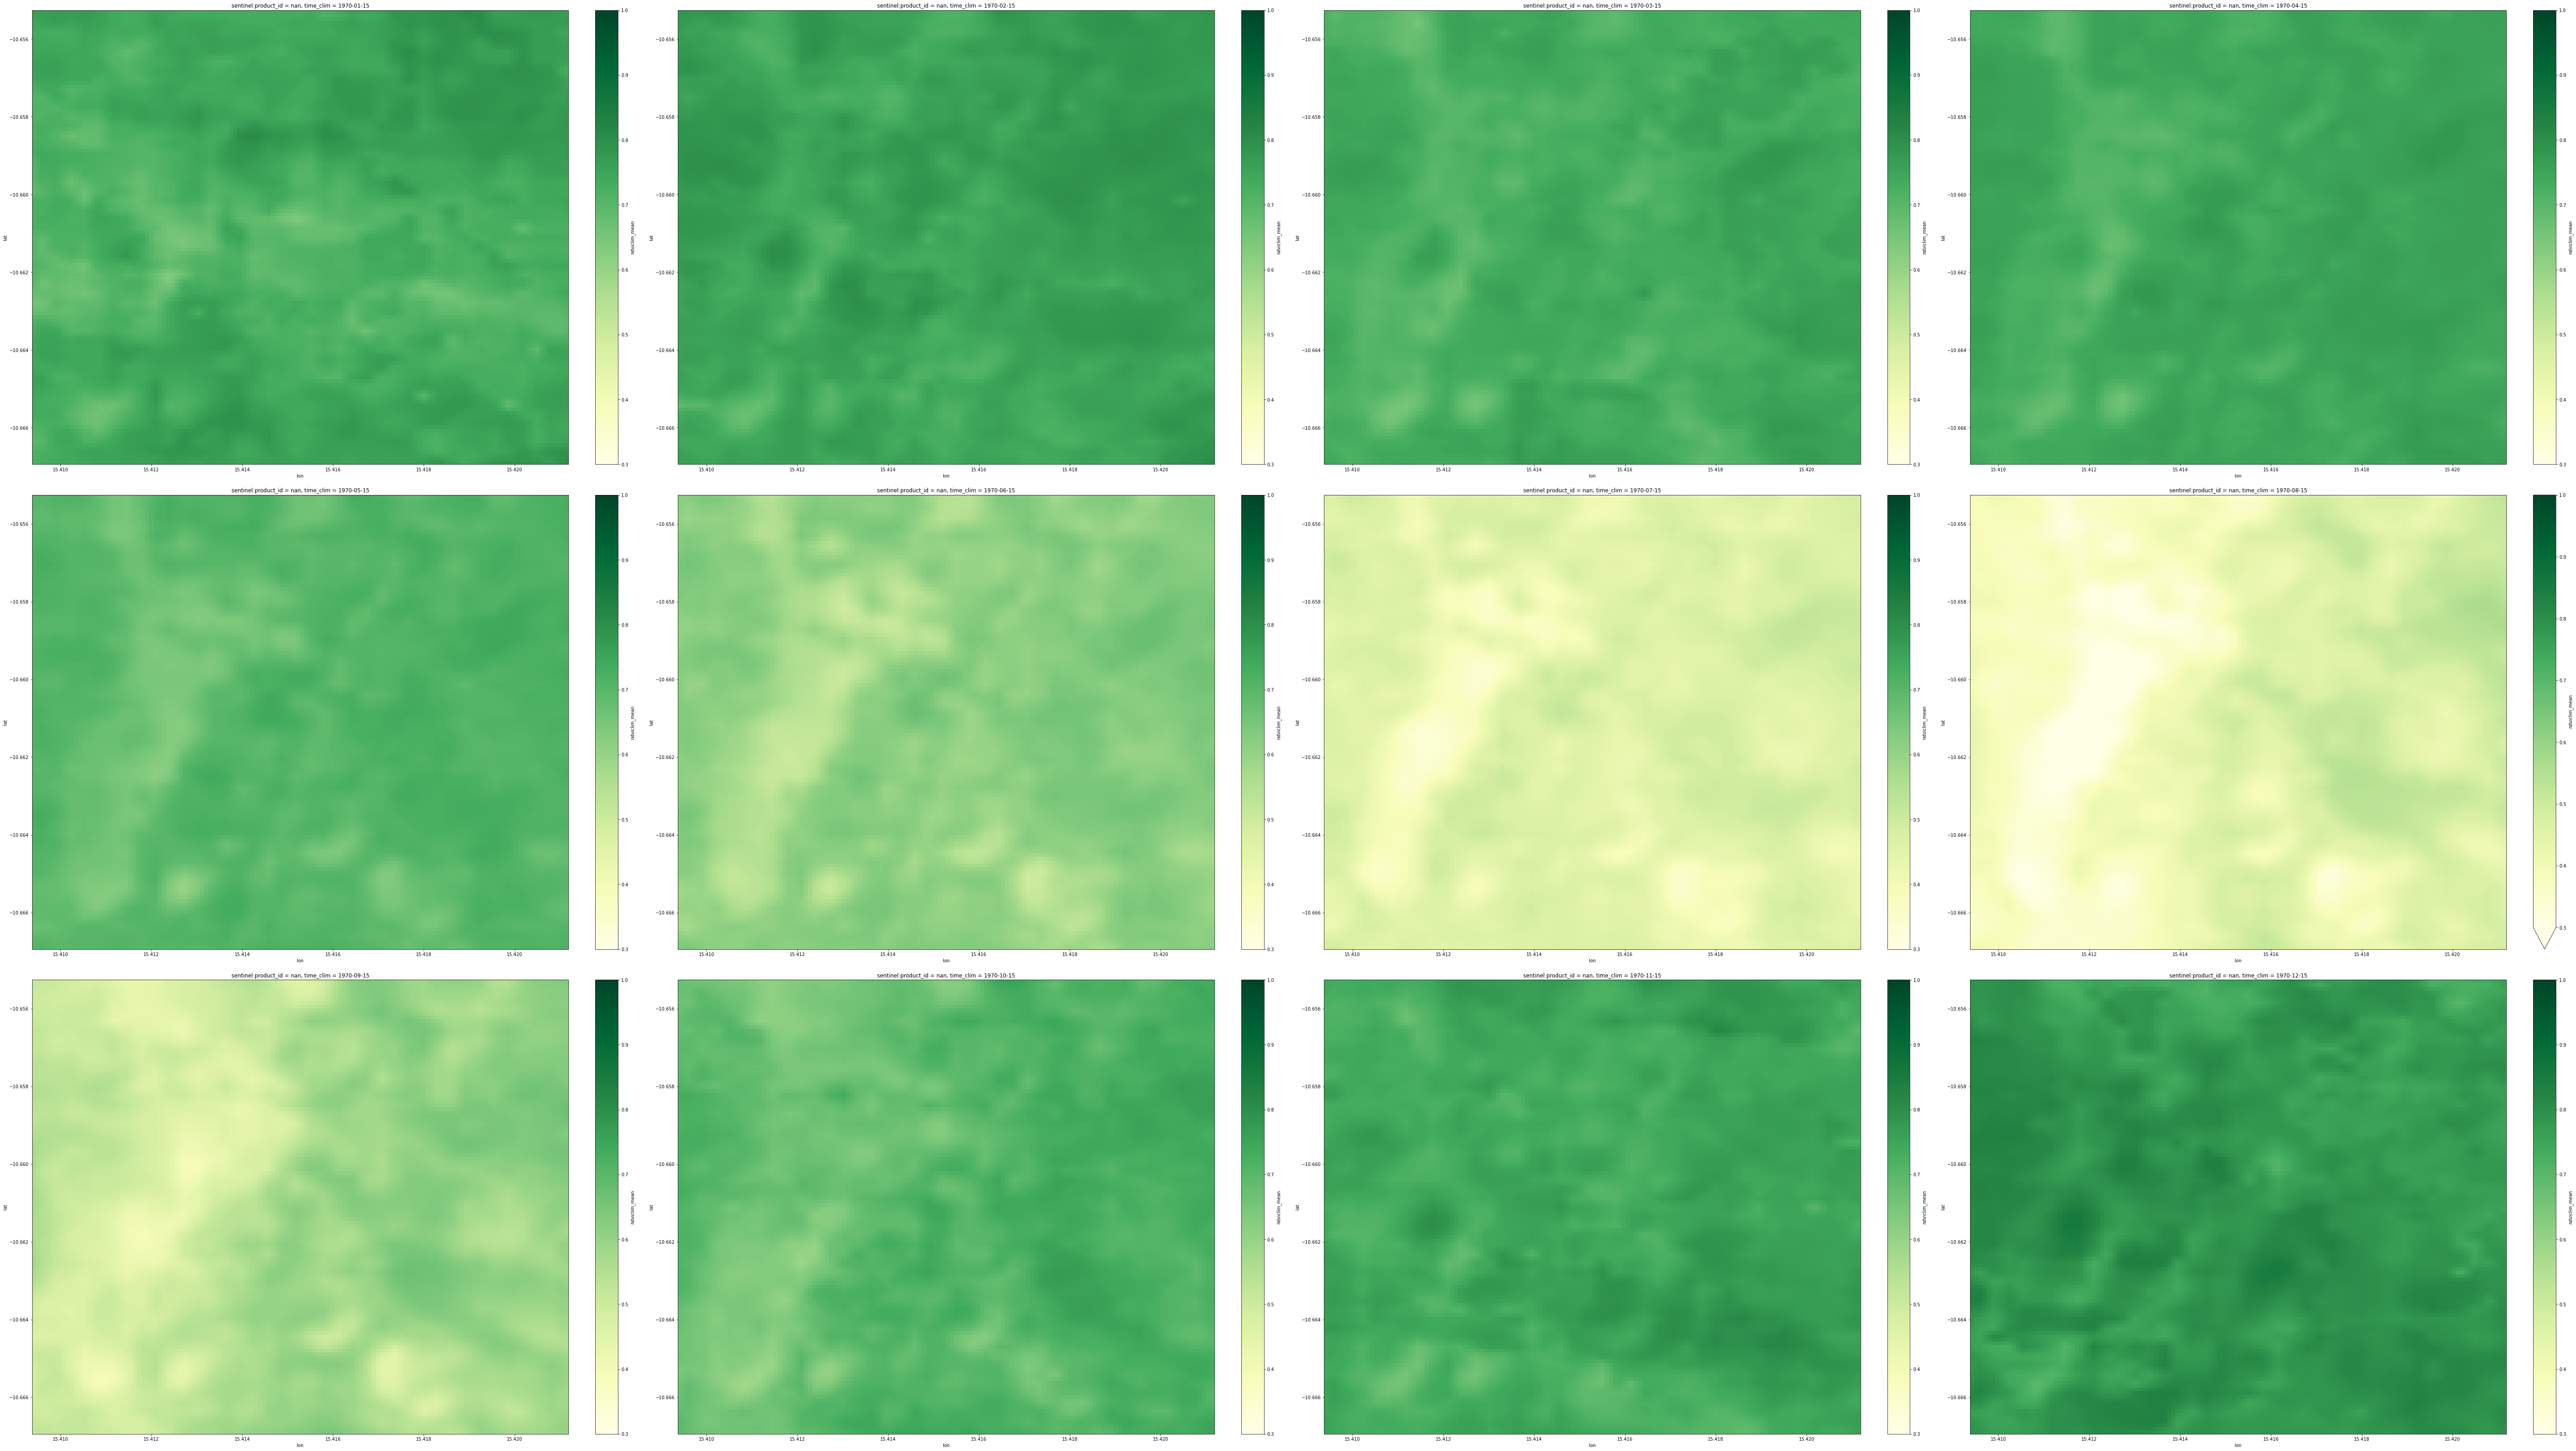

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=4, constrained_layout=True, figsize=(80, 45))

t= 0
for i in range(3):
    for j in range(4):
        minicube.ndviclim_mean.isel(time_clim=t).plot(cmap=cmap_veg, vmin=0.3, vmax=1, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

plt.draw()

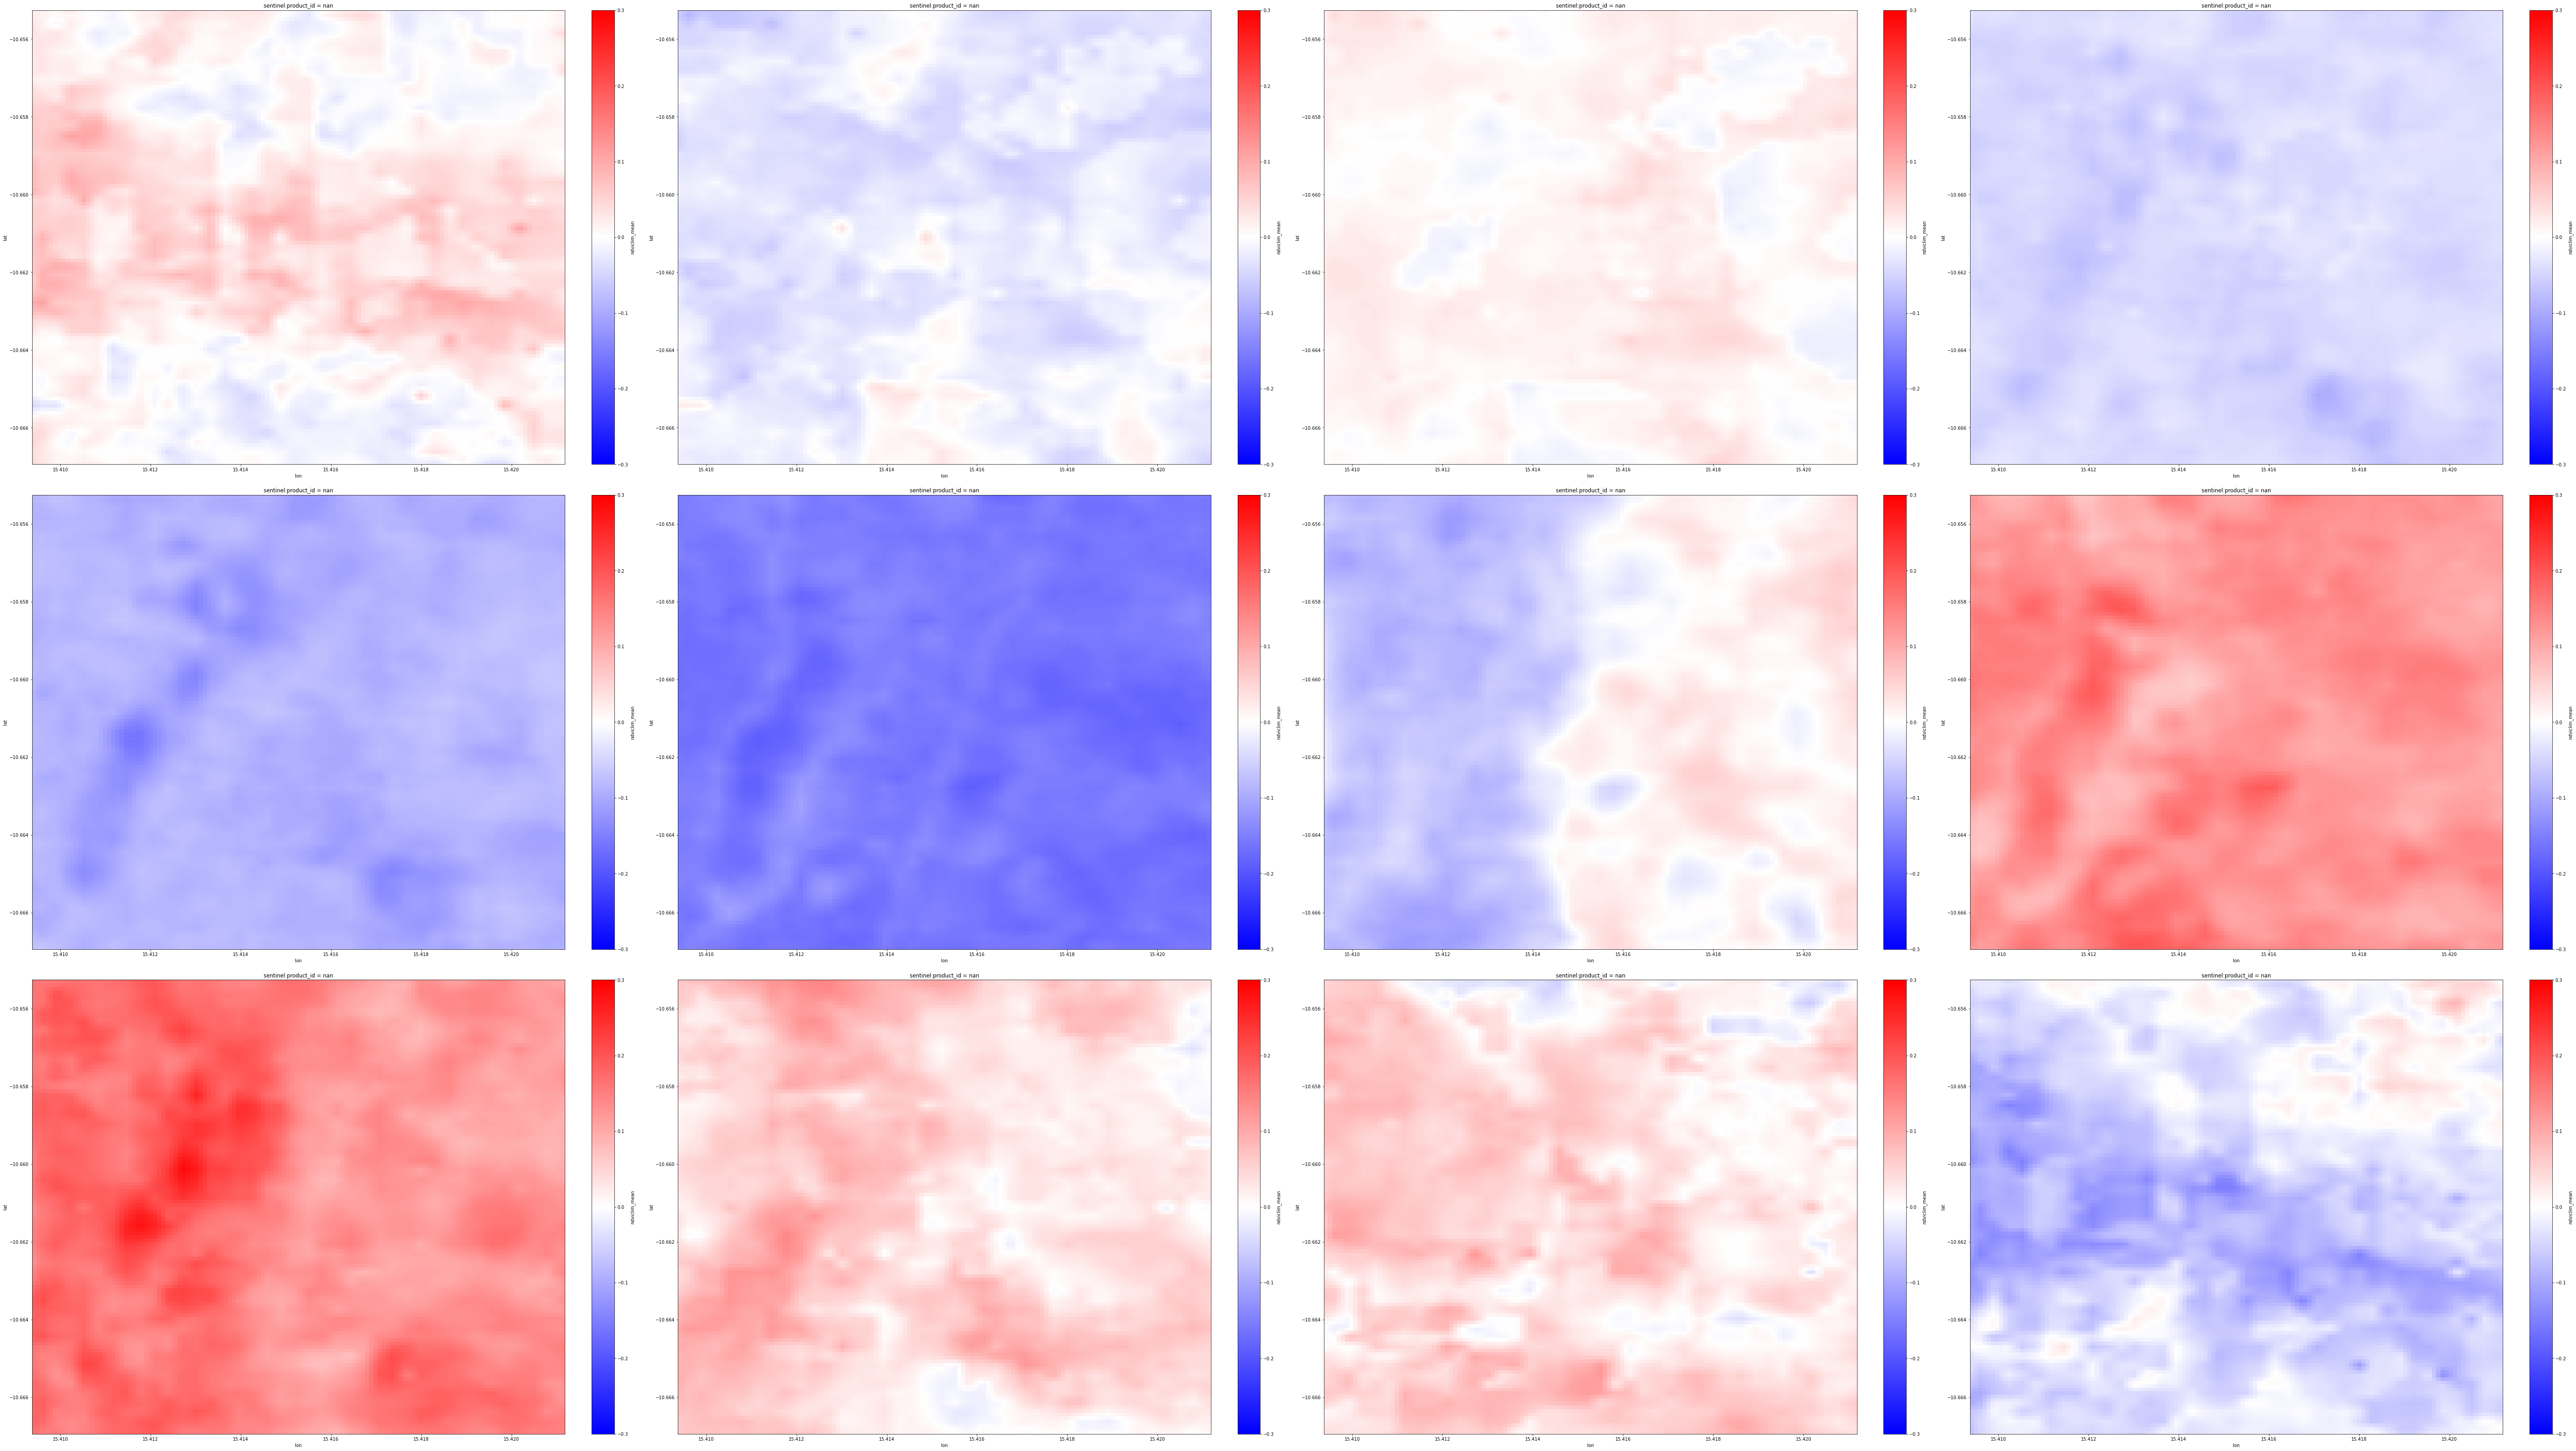

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=4, constrained_layout=True, figsize=(80, 45))

t= 0
for i in range(3):
    for j in range(4):
        if t < 11:
            (minicube.ndviclim_mean.isel(time_clim=t+1) - minicube.ndviclim_mean.isel(time_clim=t)).plot(cmap='bwr', vmin=-0.3, vmax=0.3, ax=axes[i,j])
        else:
            (minicube.ndviclim_mean.isel(time_clim=0) - minicube.ndviclim_mean.isel(time_clim=t)).plot(cmap='bwr', vmin=-0.3, vmax=0.3, ax=axes[i,j])

        t += 1 # non gap filled, a lot of nan values

plt.draw()


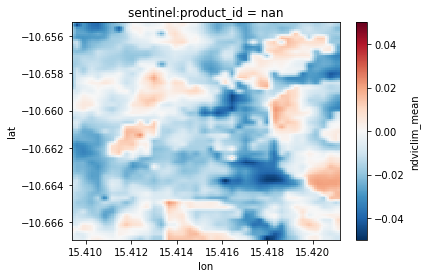

In [23]:
(minicube.ndviclim_mean.isel(time_clim=2) - minicube.ndviclim_mean.isel(time_clim=3)).plot()


In [110]:
lst = []
for path in minicube_paths:
    minicube = xr.open_dataset(path)
    avail = minicube['s2_avail']
    first_value = np.where(avail == 1)[0]
    index = (first_value - np.where(avail == 1)[0][0]) % 5
    if sum(index) != 0:
        print(path)
        print(index)
        print(first_value)
    


    

/workspace/data/africa_v0.3/train/Angola/33LWL4117.nc
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 2 3 4 0 1 2]
[  4   9  14  19  24  29  34  39  44  49  54  59  64  69  74  79  84  89
  94  99 104 109 114 119 124 129 134 139 144 149 154 159 164 169 174 179
 184 189 194 199 204 209 214 219 224 229 234 239 244 249 254 259 264 269
 274 279 284 289 294 299 304 309 314 339 349 354 359 364 369 379 384 389
 394 399 404 409 414 419 424 425 426 427 428 429 430 431]
/workspace/data/africa_v0.3/train/Malawi/36LWL0753.nc
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 3 0]
[  4   9  14  19  24  29  34  39  44  49  54  59  64  69  74  79  84  89
  94  99 104 109 114 119 124 129 134 139 144 149 154 159 164 169 174 179
 184 189 194 199 204 209 214 219 224 229 2

In [87]:
import pandas as pd
df = pd.DataFrame(lst)
df.to_numpy()

array([[  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
        220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
        275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
        330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
        385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
        440., 445.],
       [  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 120., 125., 130., 135., 140., 145., 150., 155., 160., 165.,
        170., 175., 180., 185., 190., 195., 200., 205., 210., 215., 220.,
        225., 230., 240., 245., 250., 255., 260., 265., 270., 275., 280.,
        285., 290

In [16]:
minicube.srtm_dem.values

array([[1237.9962, 1237.8446, 1237.6929, ..., 1225.4384, 1225.8129,
        1226.181 ],
       [1237.9935, 1237.731 , 1237.4685, ..., 1225.7682, 1225.9255,
        1226.0721],
       [1237.881 , 1237.5826, 1237.2844, ..., 1226.099 , 1226.1483,
        1226.1859],
       ...,
       [1226.8981, 1226.6957, 1226.4937, ..., 1224.9934, 1225.3292,
        1225.6653],
       [1226.0582, 1226.0582, 1226.0582, ..., 1225.0223, 1225.3392,
        1225.6554],
       [1226.718 , 1226.718 , 1226.718 , ..., 1225.3523, 1225.452 ,
        1225.5465]], dtype=float32)

In [106]:
import math
minicube = xr.open_dataset(minicube_paths[0])
avail = minicube['s2_avail']
avail[np.isnan(avail.values)] = 0
first_value = np.where(avail == 1)[0]
index = (first_value - np.where(avail == 1)[0][0]) % 5
print(sum(index))

0


In [101]:
import pandas as pd
avail[first_value].time.values
#df = pd.Series(first_value)
#df.head()

array(['2019-08-08T00:00:00.000000000', '2019-08-13T00:00:00.000000000',
       '2019-08-18T00:00:00.000000000', '2019-08-23T00:00:00.000000000',
       '2019-08-28T00:00:00.000000000', '2019-09-02T00:00:00.000000000',
       '2019-09-07T00:00:00.000000000', '2019-09-12T00:00:00.000000000',
       '2019-09-17T00:00:00.000000000', '2019-09-22T00:00:00.000000000',
       '2019-09-27T00:00:00.000000000', '2019-10-02T00:00:00.000000000',
       '2019-10-07T00:00:00.000000000', '2019-10-12T00:00:00.000000000',
       '2019-10-17T00:00:00.000000000', '2019-10-22T00:00:00.000000000',
       '2019-10-27T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-11-06T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-21T00:00:00.000000000',
       '2019-11-26T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-12-11T00:00:00.000000000',
       '2019-12-16T00:00:00.000000000', '2019-12-21

In [6]:
minicube_path = '/workspace/data/africa_v0.3/train/Angola/33LWL4117.nc'
import matplotlib.pyplot as plt
import matplotlib.colors as clr
cmap_veg = clr.LinearSegmentedColormap.from_list('veg', ['#ffffe5','#f7fcb9','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#006837','#004529'])
minicube = xr.open_dataset(minicube_paths[1])

avail = minicube.s2_avail
print(len(avail)) 
print(np.nansum(avail.values))
#np.where(avail == 1)[0]
first_value = np.where(avail == 1)[0]
index = (first_value - np.where(avail == 1)[0][0]) % 5
print(first_value[22], first_value[23])


450
86.0
114 124


In [35]:
index = np.where(avail == 1)[0]
minicube.era5land_pev_mean.values

array([-0.0047173 , -0.01181964, -0.0087259 , -0.00749579, -0.00716339,
       -0.00734018, -0.00699837, -0.00742588, -0.00654498, -0.0100938 ,
       -0.00863515, -0.00993449, -0.01145397, -0.0104877 , -0.00809908,
       -0.00832628, -0.00781979, -0.00811689, -0.00712306, -0.00967772,
       -0.00884891, -0.01071625, -0.00724406, -0.00854978, -0.010199  ,
       -0.00895579, -0.01088799, -0.00979804, -0.00748739, -0.00976981,
       -0.00959436, -0.00816361, -0.01163278, -0.01274121, -0.00870876,
       -0.01094815, -0.01012842, -0.01200651, -0.01546862, -0.01253956,
       -0.01284944, -0.00998759, -0.0100649 , -0.00681386, -0.00906233,
       -0.01019765, -0.00861532, -0.00500029, -0.0072212 , -0.00928314,
       -0.00912686, -0.00774349, -0.00808295, -0.00627644, -0.01045309,
       -0.01158068, -0.01086178, -0.00778383, -0.01046216, -0.0097204 ,
       -0.00754318, -0.00639945, -0.00707198, -0.0092818 , -0.01301849,
       -0.01480719, -0.0141313 , -0.01296909, -0.01183107, -0.01

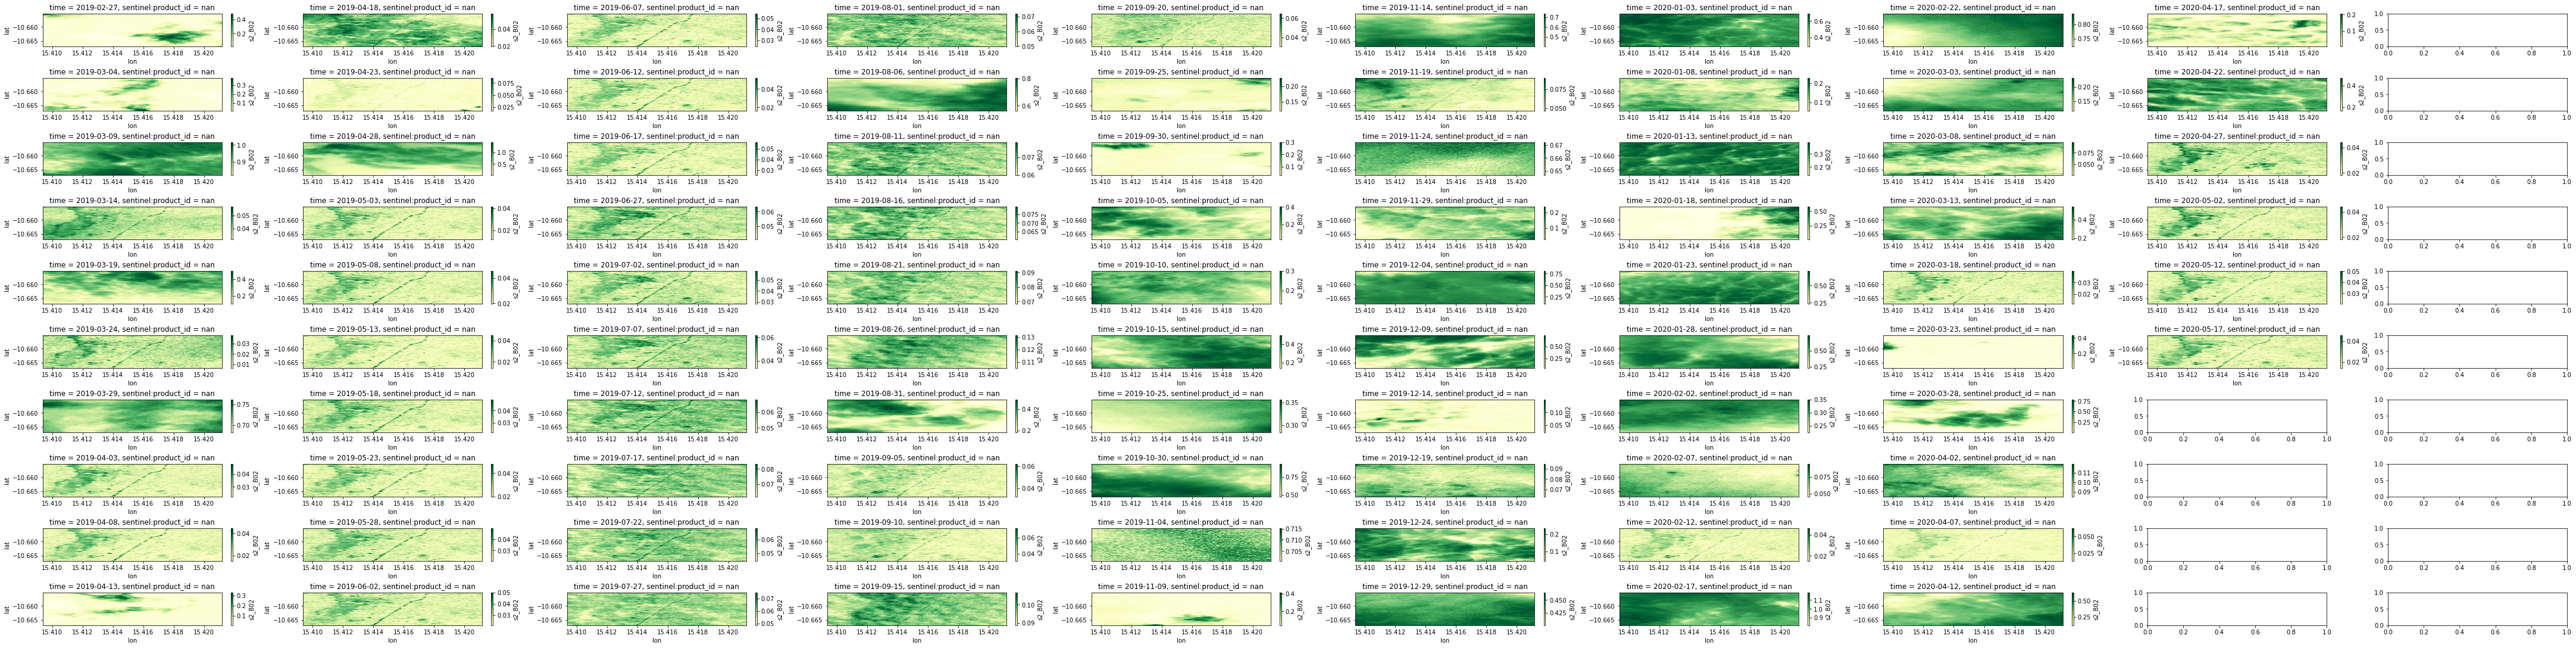

In [5]:
fig, axes = plt.subplots(nrows=10, ncols=10, constrained_layout=True, figsize=(60, 15))
t = 0
index = np.where(avail == 1)[0]
i, j = 0, 0
for t in index:
    minicube.s2_B02.isel(time=t).plot(cmap=cmap_veg, ax=axes[i,j])
    i += 1
    if i == 10:
        j += 1
        i = 0

plt.draw()

In [5]:
minicube_path = '/workspace/data/africa_v0.3/train/Angola/33LWL4117.nc'
minicube = xr.open_dataset(minicube_path)
s2_avail = minicube.s2_avail
index_avail = np.where(s2_avail == 1)[0]
X = minicube[['s2_B02', 's2_B03', 's2_B04']].isel(time=index_avail).to_array()
X.shape

(3, 86, 128, 128)

In [25]:
index_avail = np.where(s2_avail == 1)[0]
print(index_avail)
print(index_avail[1:] - index_avail[:-1] - 5)
A = index_avail[1:] - index_avail[:-1] - 5
print(np.where(A > 0)[0])

[  4   9  14  19  24  29  34  39  44  49  54  59  64  69  74  79  84  89
  94  99 104 109 114 119 124 129 134 139 144 149 154 159 164 169 174 179
 184 189 194 199 204 209 214 219 224 229 234 239 244 249 254 259 264 269
 274 279 284 289 294 299 304 309 314 339 349 354 359 364 369 379 384 389
 394 399 404 409 414 419 424 425 426 427 428 429 430 431]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  5  0  0  0  0  5  0  0  0
  0  0  0  0  0  0 -4 -4 -4 -4 -4 -4 -4]
[62 63 68]


In [1]:
aux = {}
if aux:
    print('works')
print('2')

2
